In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import torch
from torchvision import transforms
import numpy as np
import cv2

# Function to yield frames from a video file
def extract_frames(video_path):
    video_capture = cv2.VideoCapture(video_path)
    success = True
    while success:
        success, frame = video_capture.read()
        if success:
            yield frame

# Function to validate videos and check for corruption by loading frames
def validate_video_frames(video_path, transformation):
    frame_limit = 20  # Total number of frames expected
    captured_frames = []

    for idx, frame in enumerate(extract_frames(video_path)):
        if frame is not None:
            transformed_frame = transformation(frame)
            captured_frames.append(transformed_frame)
            if len(captured_frames) == frame_limit:
                break

    if len(captured_frames) < frame_limit:
        raise ValueError("Not enough valid frames could be extracted.")

    return torch.stack(captured_frames)

# Image size and normalization parameters
image_size = 112
mean_values = [0.485, 0.456, 0.406]
std_dev_values = [0.229, 0.224, 0.225]

# Transformations applied to each frame
frame_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean_values, std_dev_values)
])

# Collect all video paths
video_paths = glob.glob('/content/drive/My Drive/Face_only_data/*.mp4')

print("Total number of videos:", len(video_paths))

processed_count = 0
for video in video_paths:
    try:
        validate_video_frames(video, frame_transforms)
        processed_count += 1
    except Exception as e:
        print(f"Processed videos: {processed_count}, Remaining: {len(video_paths) - processed_count}")
        print("Corrupted or error video path:", video)
        break  # To stop at the first error, remove this if processing should continue

print("Videos remaining:", len(video_paths) - processed_count)


Total number of videos: 828
Videos remaining: 0


In [ ]:
import glob
import os

# Define the path to the directory containing the video files
video_directory = '/content/drive/My Drive/Face_only_data/'

# Use glob to find all .mp4 files in the directory
video_paths = glob.glob(os.path.join(video_directory, '*.mp4'))

# Extract the video names without the '.mp4' extension
video_names = [os.path.splitext(os.path.basename(path))[0] for path in video_paths]

# Print the list of video names
print(video_names)



['cchjzlcplu', 'nrzgbofbkb', 'cjkctqqakb', 'dywxefvgfi', 'pcvpkdmppy', 'dbrzclhznh', 'halvwiltfs', 'feqrqoxiwy', 'xemhvuvgrn', 'aejroilouc', 'colylxvjmu', 'cmmoeaeftx', 'afovojcvgh', 'onanqtsdjk', 'oocincvedt', 'enclclienu', 'gpalfmianp', 'qsmfsqpryo', 'bpogbhuwvd', 'afkfweamui', 'oobeaklccb', 'ybvefuzbmr', 'yvfhtwraue', 'azloskdmkl', 'vajkicalux', 'hjxeekdmab', 'arcviozhqq', 'ekzltdwpjj', 'botswdcyee', 'rqmhdpwpxp', 'ekboxwrwuv', 'dzwleiudsk', 'axyzsqhnts', 'qxyuqjzblq', 'cwxjlssagj', 'gaozfnsrob', 'avlfjeuozz', 'fmegtxqovc', 'txnmkabufs', 'xrltimmbyc', 'xhfbvmlygm', 'hqucoizzbg', 'cvtzzjrlfa', 'aqvowsdlld', 'foohyhbmhe', 'apzlacqgnz', 'hfmgqguilx', 'ncmpqwmnzb', 'ncmxzviawx', 'psesikjaxx', 'uesrhvqztn', 'okgelildpc', 'fqgypsunzr', 'gpktopynlp', 'atcfypvdpu', 'uqguyibemu', 'tjumanauqk', 'ctulsxsjwx', 'bjcesbmllx', 'hkhutqidrk', 'gzsppugoek', 'rxdoimqble', 'vqqvveifjn', 'ayfjanopir', 'bjaejffikm', 'fktzmvlqpf', 'hqwjsjtkru', 'xocxiqxrzn', 'gduzikqfgp', 'cmvncstbkx', 'dvzugrydvc', 'hihl

In [ ]:
import os
import pandas as pd

def load_and_filter_data(folder_path, csv_file_path):
    # List all video files in the specified folder and remove the '.mp4' extension
    video_files = {file_name[:-4] for file_name in os.listdir(folder_path) if file_name.endswith('.mp4')}

    # Load the CSV file
    df = pd.read_csv(csv_file_path)

    # Filter the DataFrame to only include rows with filenames in your folder
    filtered_df = df[df['name'].isin(video_files)]

    return filtered_df, video_files

def check_perfect_match(filtered_df, video_files):
    # Extract the filenames from the filtered DataFrame
    filtered_files = set(filtered_df['name'])

    # Check if the sets are equal and report mismatches
    match = filtered_files == video_files
    if not match:
        missing_in_csv = video_files - filtered_files
        missing_in_folder = filtered_files - video_files
        print("Missing in CSV (but in folder):", missing_in_csv)
        print("Missing in Folder (but in CSV):", missing_in_folder)
    return match

# Specify the path to your folder and the CSV file
folder_path = '/content/drive/My Drive/Face_only_data'
csv_file_path = '/content/drive/My Drive/metadata.csv'

# Load the data and filter it
filtered_df, video_files = load_and_filter_data(folder_path, csv_file_path)

# Check for a perfect match
match_result = check_perfect_match(filtered_df, video_files)
print("Perfect match:", match_result)


Perfect match: True


In [ ]:
import os
import random

video_paths = glob.glob('/content/drive/My Drive/Face_only_data/*.mp4')


# Print the names of the files without the '.mp4' part
video_names = [os.path.splitext(os.path.basename(path))[0] for path in video_paths]
print(video_names)

random.shuffle(video_paths)  # Shuffle to randomize the order of processing

frame_count = [20] * len(video_paths)  # Simply replicate 20 for each video in the list

# Output collected data
print("Frame counts are:", frame_count)
print("Total number of videos:", len(frame_count))
print('Average frame per video:', np.mean(frame_count))

['cchjzlcplu', 'nrzgbofbkb', 'cjkctqqakb', 'dywxefvgfi', 'pcvpkdmppy', 'dbrzclhznh', 'halvwiltfs', 'feqrqoxiwy', 'xemhvuvgrn', 'aejroilouc', 'colylxvjmu', 'cmmoeaeftx', 'afovojcvgh', 'onanqtsdjk', 'oocincvedt', 'enclclienu', 'gpalfmianp', 'qsmfsqpryo', 'bpogbhuwvd', 'afkfweamui', 'oobeaklccb', 'ybvefuzbmr', 'yvfhtwraue', 'azloskdmkl', 'vajkicalux', 'hjxeekdmab', 'arcviozhqq', 'ekzltdwpjj', 'botswdcyee', 'rqmhdpwpxp', 'ekboxwrwuv', 'dzwleiudsk', 'axyzsqhnts', 'qxyuqjzblq', 'cwxjlssagj', 'gaozfnsrob', 'avlfjeuozz', 'fmegtxqovc', 'txnmkabufs', 'xrltimmbyc', 'xhfbvmlygm', 'hqucoizzbg', 'cvtzzjrlfa', 'aqvowsdlld', 'foohyhbmhe', 'apzlacqgnz', 'hfmgqguilx', 'ncmpqwmnzb', 'ncmxzviawx', 'psesikjaxx', 'uesrhvqztn', 'okgelildpc', 'fqgypsunzr', 'gpktopynlp', 'atcfypvdpu', 'uqguyibemu', 'tjumanauqk', 'ctulsxsjwx', 'bjcesbmllx', 'hkhutqidrk', 'gzsppugoek', 'rxdoimqble', 'vqqvveifjn', 'ayfjanopir', 'bjaejffikm', 'fktzmvlqpf', 'hqwjsjtkru', 'xocxiqxrzn', 'gduzikqfgp', 'cmvncstbkx', 'dvzugrydvc', 'hihl

In [ ]:
!pip install face_recognition

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
import pandas as pd

class VideoDataset(torch.utils.data.Dataset):
    def __init__(self, video_paths, labels_df, transform=None, sequence_length=20):
        self.video_paths = video_paths
        self.labels = labels_df
        self.transform = transform
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_name = self.video_paths[idx]
        video_path = os.path.join('/content/drive/My Drive/Face_only_data/', video_name + '.mp4')

        if not os.path.exists(video_path):
            raise FileNotFoundError(f"Video file not found: {video_path}")

        frames = []
        label_entries = self.labels[self.labels['name'] == video_name]
        if label_entries.empty:
            raise ValueError(f"No label found for video {video_name}")

        label_value = label_entries['label'].values[0]
        label = 0 if label_value == 'FAKE' else 1

        for frame in self.extract_frames(video_path):
            if self.transform:
                frame = self.transform(frame)
            frames.append(frame)
            if len(frames) == self.sequence_length:
                break

        if not frames:
            raise ValueError(f"No frames could be extracted from {video_path}. Check video format and codec.")

        stacked_frames = torch.stack(frames)
        return stacked_frames, label

    def extract_frames(self, path):
        vidObj = cv2.VideoCapture(path)
        success, image = vidObj.read()
        while success:
            yield image
            success, image = vidObj.read()

def plot_image(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    # Normalize the pixel values to [0, 255]
    image = image * np.array([0.22803, 0.22145, 0.216989]) + np.array([0.43216, 0.394666, 0.37645])
    image *= 255.0
    plt.imshow(image.astype('uint8'))  # Ensure datatype is correct for displaying
    plt.show()



TRAIN: Real: 172 Fake: 490
VALIDATION: Real: 38 Fake: 86
TEST: Real: 11 Fake: 31


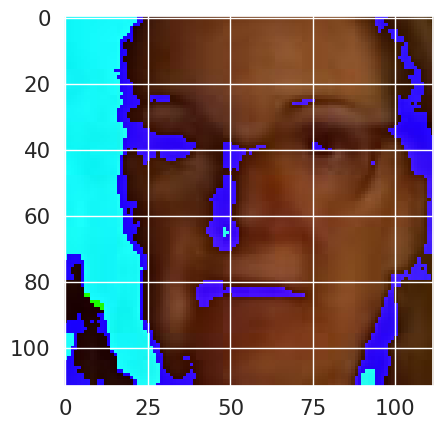

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader

# Load the labels
header_list = ["name", "label"]
labels_df = filtered_df

# Split the video files for training, validation, and testing
video_files = labels_df['name'].tolist()  # Assuming you want to split based on the csv file

# Splitting into training and temp (validation + test)
train_videos, temp_videos = train_test_split(video_files, test_size=0.2, random_state=42)

# Splitting temp into validation and test
valid_videos, test_videos = train_test_split(temp_videos, test_size=0.25, random_state=42)  # 0.25 * 0.2 = 0.05

# Helper function to count the number of real and fake videos
def count_video_types(video_list, labels_df):
    count_fake = labels_df[labels_df['name'].isin(video_list) & (labels_df['label'] == 'FAKE')].shape[0]
    count_real = labels_df[labels_df['name'].isin(video_list) & (labels_df['label'] == 'REAL')].shape[0]
    return count_real, count_fake

# Count and print the number of real and fake videos in each set
real_train, fake_train = count_video_types(train_videos, labels_df)
real_valid, fake_valid = count_video_types(valid_videos, labels_df)
real_test, fake_test = count_video_types(test_videos, labels_df)
print("TRAIN: Real:", real_train, "Fake:", fake_train)
print("VALIDATION: Real:", real_valid, "Fake:", fake_valid)
print("TEST: Real:", real_test, "Fake:", fake_test)

# Define transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

val_transforms = train_transforms  # Same transformations for validation

# Create datasets using the previously defined `video_dataset` class
train_data = VideoDataset(train_videos, labels_df, sequence_length=10, transform=train_transforms)
val_data = VideoDataset(valid_videos, labels_df, sequence_length=10, transform=val_transforms)
test_data = VideoDataset(test_videos, labels_df, sequence_length=10, transform=val_transforms)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=2)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

# Example to plot an image from the dataset
image, label = train_data[0]
plot_image(image[0])  # Assuming im_plot is defined elsewhere


In [ ]:
import torch.nn as nn
from torchvision import models

class EnhancedVideoModel(nn.Module):
    def __init__(self, num_classes, feature_dim=2048, num_lstm_layers=2, lstm_hidden_dim=1024, use_bidirectional=True):
        super(EnhancedVideoModel, self).__init__()
        # Using an updated version of ResNeXt with different parameters
        model_config = models.resnext101_32x8d(pretrained=True)
        self.features = nn.Sequential(*list(model_config.children())[:-2])

        # Adjust LSTM for bidirectionality and different hidden dimensions
        self.temporal_layers = nn.LSTM(input_size=feature_dim, hidden_size=lstm_hidden_dim,
                                       num_layers=num_lstm_layers, bidirectional=use_bidirectional)
        self.activation_fn = nn.ReLU()  # Changed to ReLU for stability
        self.regularization = nn.Dropout(0.5)  # Increased dropout for better generalization
        self.fc = nn.Linear(lstm_hidden_dim * 2 if use_bidirectional else lstm_hidden_dim, num_classes)
        self.global_pool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

    def forward(self, inputs):
        batch, sequences, channels, height, width = inputs.size()
        inputs_reshaped = inputs.view(batch * sequences, channels, height, width)
        conv_outputs = self.features(inputs_reshaped)
        pooled_outputs = self.global_pool(conv_outputs)
        pooled_outputs = pooled_outputs.view(batch, sequences, -1)
        lstm_out, _ = self.temporal_layers(pooled_outputs)
        temporal_features = torch.mean(lstm_out, dim=1)
        activated_features = self.activation_fn(temporal_features)
        final_output = self.fc(self.regularization(activated_features))
        return conv_outputs, final_output

In [ ]:
model = EnhancedVideoModel(num_classes=2).cuda()

dummy_input = torch.zeros((1, 20, 3, 112, 112), dtype=torch.float).cuda()

# Perform a forward pass through the model
feature_maps, outputs = model(dummy_input)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys

def perform_training(epoch, total_epochs, data_loader, model, loss_func, opt):
    model.train()
    loss_tracker = MetricsTracker()
    accuracy_tracker = MetricsTracker()

    for batch_idx, (data, labels) in enumerate(data_loader):
        if torch.cuda.is_available():
            labels = labels.cuda().type(torch.cuda.LongTensor)
            data = data.cuda()

        _, predictions = model(data)
        loss = loss_func(predictions, labels)
        accuracy = compute_accuracy(predictions, labels)

        loss_tracker.update(loss.item(), data.size(0))
        accuracy_tracker.update(accuracy, data.size(0))

        opt.zero_grad()
        loss.backward()
        opt.step()

        sys.stdout.write(
            f"\r[Epoch {epoch}/{total_epochs}] [Batch {batch_idx}/{len(data_loader)}] [Loss: {loss_tracker.average:.6f}, Accuracy: {accuracy_tracker.average:.2f}%]"
        )
    torch.save(model.state_dict(), os.path.join('/content', 'checkpoint_epoch_{}.pt'.format(epoch)))
    return loss_tracker.average, accuracy_tracker.average

def perform_testing(epoch, model, data_loader, loss_func):
    print('Starting Testing Phase')
    model.eval()
    loss_tracker = MetricsTracker()
    accuracy_tracker = MetricsTracker()
    predictions_list = []
    labels_list = []

    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(data_loader):
            if torch.cuda.is_available():
                labels = labels.cuda().type(torch.cuda.FloatTensor)
                data = data.cuda()

            _, predictions = model(data)
            loss = loss_func(predictions, labels.type(torch.cuda.LongTensor)).mean()
            accuracy = compute_accuracy(predictions, labels)

            labels_list.extend(labels.type(torch.cuda.LongTensor).cpu().numpy().reshape(-1).tolist())
            predictions_list.extend(torch.max(predictions, 1)[1].cpu().numpy().reshape(-1).tolist())

            loss_tracker.update(loss.item(), data.size(0))
            accuracy_tracker.update(accuracy, data.size(0))

            sys.stdout.write(
                f"\r[Batch {batch_idx}/{len(data_loader)}] [Loss: {loss_tracker.average:.6f}, Accuracy: {accuracy_tracker.average:.2f}%]"
            )
        print(f'\nFinal Testing Accuracy: {accuracy_tracker.average:.2f}%')
    return labels_list, predictions_list, loss_tracker.average, accuracy_tracker.average

class MetricsTracker:
    """Utility class to keep track of performance metrics."""
    def __init__(self):
        self.reset()

    def reset(self):
        self.value = 0
        self.average = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.value = val
        self.sum += val * n
        self.count += n
        self.average = self.sum / self.count if self.count != 0 else 0

def compute_accuracy(outputs, targets):
    with torch.no_grad():
        _, predicted = outputs.max(1)
        correct = predicted.eq(targets).sum().item()
        accuracy = 100 * correct / targets.size(0)
    return accuracy


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to display confusion matrix and compute accuracy
def display_confusion_matrix(actual, predicted):
    # Calculate the confusion matrix from true and predicted labels
    conf_matrix = confusion_matrix(actual, predicted)
    print('True Positives = ', conf_matrix[0][0])
    print('False Positives = ', conf_matrix[0][1])
    print('True Negatives = ', conf_matrix[1][1])
    print('False Negatives = ', conf_matrix[1][0])
    print('\n')

    # Create a DataFrame for better visualization of the confusion matrix
    matrix_df = pd.DataFrame(conf_matrix, index=['Fake', 'Real'], columns=['Fake', 'Real'])
    sns.set(font_scale=1.4)  # Adjust font size for readability
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix_df, annot=True, annot_kws={"size": 16}, fmt='d')  # Use 'd' for integer format.
    plt.ylabel('Actual Category')
    plt.xlabel('Predicted Category')
    plt.show()

    # Calculate and print the accuracy from the confusion matrix
    total_correct = conf_matrix[0][0] + conf_matrix[1][1]
    total_elements = conf_matrix.sum()
    accuracy = (total_correct / total_elements) * 100
    print("Overall Accuracy: {:.2f}%".format(accuracy))


In [ ]:
import matplotlib.pyplot as plt

def visualize_training_loss(training_losses, validation_losses, total_epochs):
    # Preparing data for the plot
    epoch_indices = range(1, total_epochs + 1)
    print("Number of Epochs:", total_epochs)

    # Plotting training and validation loss
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_indices, training_losses, 'g-', label='Training Loss')
    plt.plot(epoch_indices, validation_losses, 'b--', label='Validation Loss')
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def visualize_training_accuracy(training_accuracies, validation_accuracies, total_epochs):
    # Setting up data for the plot
    epoch_indices = range(1, total_epochs + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_indices, training_accuracies, 'g-', label='Training Accuracy')
    plt.plot(epoch_indices, validation_accuracies, 'b--', label='Validation Accuracy')
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


[Epoch 1/5] [Batch 165/166] [Loss: 0.564038, Accuracy: 73.41%]Starting Testing Phase
[Batch 30/31] [Loss: 0.576826, Accuracy: 69.35%]
Final Testing Accuracy: 69.35%
[Epoch 2/5] [Batch 165/166] [Loss: 0.455683, Accuracy: 74.62%]Starting Testing Phase
[Batch 30/31] [Loss: 0.396118, Accuracy: 81.45%]
Final Testing Accuracy: 81.45%
[Epoch 3/5] [Batch 165/166] [Loss: 0.287784, Accuracy: 88.97%]Starting Testing Phase
[Batch 30/31] [Loss: 0.371744, Accuracy: 87.90%]
Final Testing Accuracy: 87.90%
[Epoch 4/5] [Batch 165/166] [Loss: 0.185113, Accuracy: 93.96%]Starting Testing Phase
[Batch 30/31] [Loss: 0.256649, Accuracy: 90.32%]
Final Testing Accuracy: 90.32%
[Epoch 5/5] [Batch 165/166] [Loss: 0.169526, Accuracy: 93.96%]Starting Testing Phase
[Batch 30/31] [Loss: 0.324419, Accuracy: 87.90%]
Final Testing Accuracy: 87.90%
Number of Epochs: 5


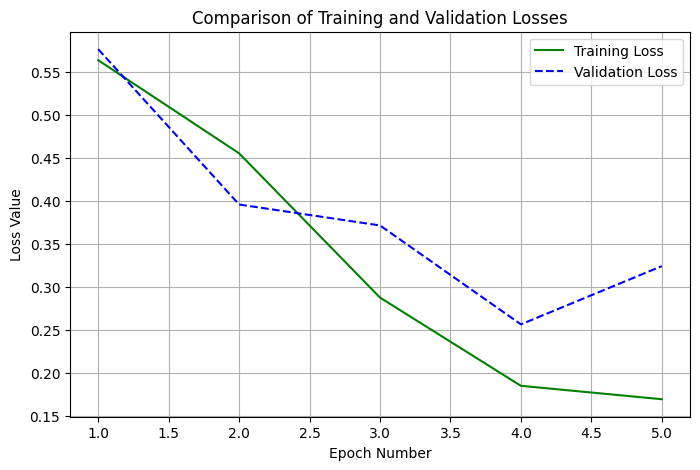

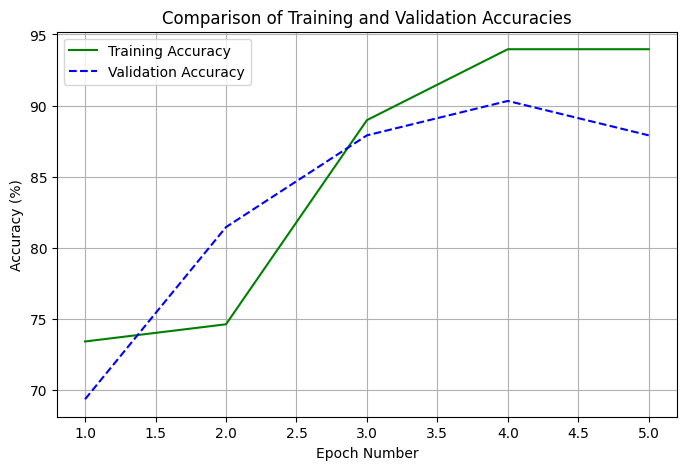

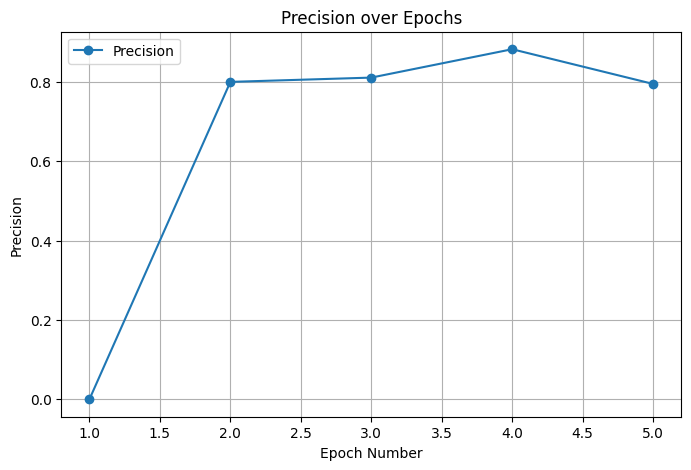

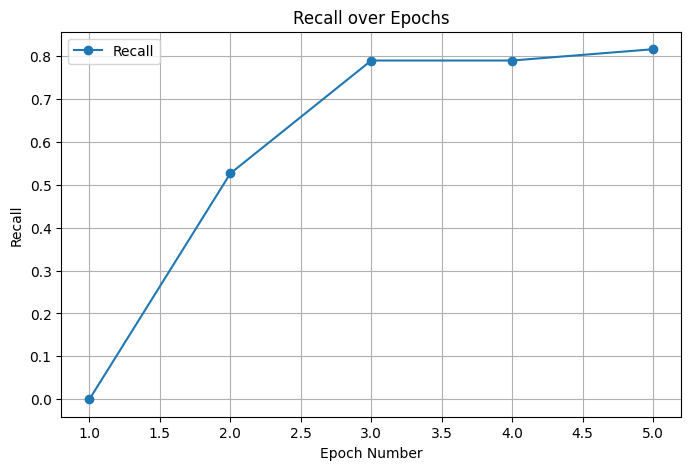

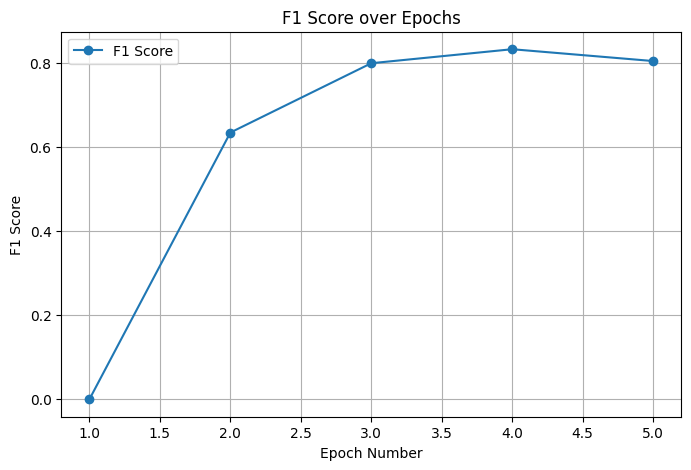

True Positives =  78
False Positives =  8
True Negatives =  31
False Negatives =  7




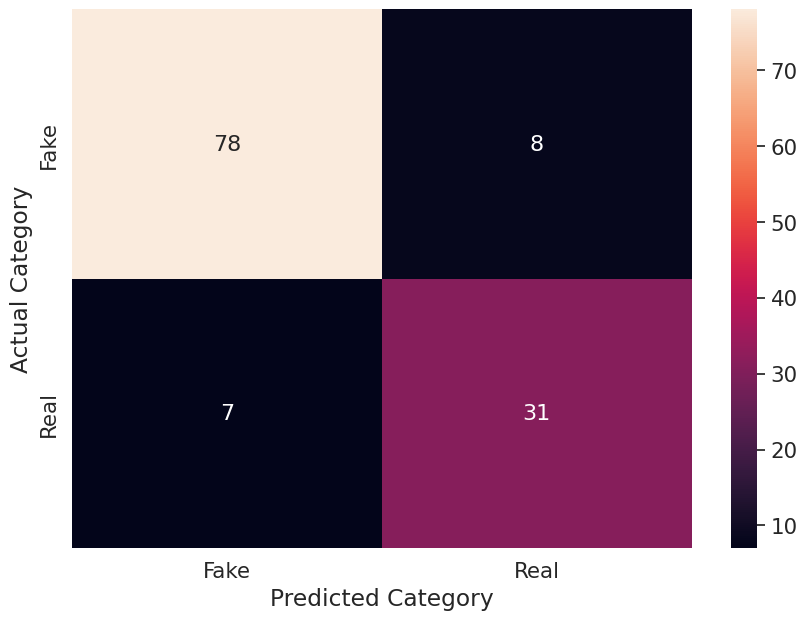

Overall Accuracy: 87.90%
None


In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Function to compute the additional metrics
def compute_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    return precision, recall, f1

learning_rate = 1e-5  # Lower learning rate
total_epochs = 5  # Define the total number of epochs for training

# Setup optimizer with weight decay for regularization
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Define the loss function with CUDA support
loss_function = nn.CrossEntropyLoss().cuda()

# Lists to track training and validation metrics
average_training_loss = []
average_training_accuracy = []
average_validation_loss = []
average_validation_accuracy = []

# Additional metrics lists
precision_list = []
recall_list = []
f1_list = []

for current_epoch in range(1, total_epochs + 1):
    # Training phase
    train_loss, train_acc = perform_training(current_epoch, total_epochs, train_loader, model, loss_function, optimizer)
    average_training_loss.append(train_loss)
    average_training_accuracy.append(train_acc)

    # Testing phase
    true_labels, predicted_labels, validation_loss, validation_accuracy = perform_testing(current_epoch, model, valid_loader, loss_function)
    average_validation_loss.append(validation_loss)
    average_validation_accuracy.append(validation_accuracy)

    # Compute additional metrics
    precision, recall, f1 = compute_metrics(true_labels, predicted_labels)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the results from training and testing
visualize_training_loss(average_training_loss, average_validation_loss, total_epochs)
visualize_training_accuracy(average_training_accuracy, average_validation_accuracy, total_epochs)

# Function to visualize additional metrics
def visualize_metrics(metric_values, metric_name):
    epochs = range(1, total_epochs + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, metric_values, marker='o', label=metric_name)
    plt.title(f'{metric_name} over Epochs')
    plt.xlabel('Epoch Number')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize each metric
visualize_metrics(precision_list, 'Precision')
visualize_metrics(recall_list, 'Recall')
visualize_metrics(f1_list, 'F1 Score')

# Compute and display the confusion matrix
computed_confusion_matrix = display_confusion_matrix(true_labels, predicted_labels)
print(computed_confusion_matrix)


In [ ]:
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import numpy as np

# Define learning rate and number of epochs for training
learning_rate = 1e-5  # Lower learning rate
total_epochs = 6  # Define the total number of epochs for training

# Setup optimizer with weight decay for regularization
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Define the loss function with CUDA support
loss_function = nn.CrossEntropyLoss().cuda()

# Lists to track training and validation metrics
average_training_loss = []
average_training_accuracy = []
average_validation_loss = []
average_validation_accuracy = []

# Training and Validation loop
for current_epoch in range(1, total_epochs + 1):
    # Training phase
    train_loss, train_acc = perform_training(current_epoch, total_epochs, train_loader, model, loss_function, optimizer)
    average_training_loss.append(train_loss)
    average_training_accuracy.append(train_acc)

    # Testing phase
    true_labels, predicted_labels, validation_loss, validation_accuracy = perform_testing(current_epoch, model, valid_loader, loss_function)
    average_validation_loss.append(validation_loss)
    average_validation_accuracy.append(validation_accuracy)




/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/6] [Batch 164/166] [Loss: 0.576414, Accuracy: 74.09%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/6] [Batch 165/166] [Loss: 0.576625, Accuracy: 74.02%]Starting Testing Phase
[Batch 30/31] [Loss: 0.553464, Accuracy: 69.35%]
Final Testing Accuracy: 69.35%
[Epoch 2/6] [Batch 165/166] [Loss: 0.454176, Accuracy: 74.62%]Starting Testing Phase
[Batch 30/31] [Loss: 0.426214, Accuracy: 79.03%]
Final Testing Accuracy: 79.03%
[Epoch 3/6] [Batch 165/166] [Loss: 0.280741, Accuracy: 90.63%]Starting Testing Phase
[Batch 30/31] [Loss: 0.353330, Accuracy: 87.90%]
Final Testing Accuracy: 87.90%
[Epoch 4/6] [Batch 165/166] [Loss: 0.179693, Accuracy: 94.71%]Starting Testing Phase
[Batch 30/31] [Loss: 0.383987, Accuracy: 89.52%]
Final Testing Accuracy: 89.52%
[Epoch 5/6] [Batch 165/166] [Loss: 0.150540, Accuracy: 95.32%]Starting Testing Phase
[Batch 30/31] [Loss: 0.333107, Accuracy: 87.10%]
Final Testing Accuracy: 87.10%
[Epoch 6/6] [Batch 165/166] [Loss: 0.131432, Accuracy: 96.07%]Starting Testing Phase
[Batch 30/31] [Loss: 0.295991, Accuracy: 90.32%]
Final Testing Accuracy: 90.32%


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import torch
import torch.nn as nn
import numpy as np

# Define learning rate and number of epochs for training
learning_rate = 1e-5  # Lower learning rate
total_epochs = 6  # Define the total number of epochs for training

# Setup optimizer with weight decay for regularization
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Define the loss function with CUDA support
loss_function = nn.CrossEntropyLoss().cuda()

# Lists to track training and validation metrics
average_training_loss = []
average_training_accuracy = []
average_validation_loss = []
average_validation_accuracy = []

# Lists to track precision, recall, and F1 score
precision_list = []
recall_list = []
f1_score_list = []

# Training and Validation loop
for current_epoch in range(1, total_epochs + 1):
    # Training phase
    train_loss, train_acc = perform_training(current_epoch, total_epochs, train_loader, model, loss_function, optimizer)
    average_training_loss.append(train_loss)
    average_training_accuracy.append(train_acc)

    # Testing phase
    true_labels, predicted_labels, validation_loss, validation_accuracy = perform_testing(current_epoch, model, valid_loader, loss_function)
    average_validation_loss.append(validation_loss)
    average_validation_accuracy.append(validation_accuracy)

    # Calculate and append precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

    # Display metrics
    print(f"Epoch {current_epoch}/{total_epochs}")
    print(f"Training Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%")
    print(f"Validation Loss: {validation_loss:.4f}, Accuracy: {validation_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("-" * 40)

# Optionally print the overall results after all epochs
print("Final Metrics:")
print("Average Training Loss:", np.mean(average_training_loss))
print("Average Training Accuracy:", np.mean(average_training_accuracy))
print("Average Validation Loss:", np.mean(average_validation_loss))
print("Average Validation Accuracy:", np.mean(average_validation_accuracy))
print("Average Precision:", np.mean(precision_list))
print("Average Recall:", np.mean(recall_list))
print("Average F1 Score:", np.mean(f1_score_list))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/6] [Batch 164/166] [Loss: 0.575267, Accuracy: 73.18%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/6] [Batch 165/166] [Loss: 0.574742, Accuracy: 73.26%]Starting Testing Phase
[Batch 30/31] [Loss: 0.504233, Accuracy: 69.35%]
Final Testing Accuracy: 69.35%
Epoch 1/6
Training Loss: 0.5747, Accuracy: 73.26%
Validation Loss: 0.5042, Accuracy: 69.35%
Precision: 0.4810, Recall: 0.6935, F1 Score: 0.5680
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 2/6] [Batch 165/166] [Loss: 0.450103, Accuracy: 75.68%]Starting Testing Phase
[Batch 30/31] [Loss: 0.438152, Accuracy: 83.06%]
Final Testing Accuracy: 83.06%
Epoch 2/6
Training Loss: 0.4501, Accuracy: 75.68%
Validation Loss: 0.4382, Accuracy: 83.06%
Precision: 0.8351, Recall: 0.8306, F1 Score: 0.8324
----------------------------------------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 3/6] [Batch 164/166] [Loss: 0.306544, Accuracy: 87.12%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 3/6] [Batch 165/166] [Loss: 0.311804, Accuracy: 86.86%]Starting Testing Phase
[Batch 30/31] [Loss: 0.406781, Accuracy: 85.48%]
Final Testing Accuracy: 85.48%
Epoch 3/6
Training Loss: 0.3118, Accuracy: 86.86%
Validation Loss: 0.4068, Accuracy: 85.48%
Precision: 0.8605, Recall: 0.8548, F1 Score: 0.8567
----------------------------------------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 4/6] [Batch 164/166] [Loss: 0.215384, Accuracy: 92.88%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 4/6] [Batch 165/166] [Loss: 0.216460, Accuracy: 92.75%]Starting Testing Phase
[Batch 30/31] [Loss: 0.286983, Accuracy: 88.71%]
Final Testing Accuracy: 88.71%
Epoch 4/6
Training Loss: 0.2165, Accuracy: 92.75%
Validation Loss: 0.2870, Accuracy: 88.71%
Precision: 0.8892, Recall: 0.8871, F1 Score: 0.8879
----------------------------------------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 5/6] [Batch 164/166] [Loss: 0.128577, Accuracy: 96.21%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 5/6] [Batch 165/166] [Loss: 0.128457, Accuracy: 96.22%]Starting Testing Phase
[Batch 30/31] [Loss: 0.273601, Accuracy: 92.74%]
Final Testing Accuracy: 92.74%
Epoch 5/6
Training Loss: 0.1285, Accuracy: 96.22%
Validation Loss: 0.2736, Accuracy: 92.74%
Precision: 0.9270, Recall: 0.9274, F1 Score: 0.9266
----------------------------------------


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 6/6] [Batch 164/166] [Loss: 0.082243, Accuracy: 97.73%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 6/6] [Batch 165/166] [Loss: 0.082027, Accuracy: 97.73%]Starting Testing Phase
[Batch 30/31] [Loss: 0.416029, Accuracy: 86.29%]
Final Testing Accuracy: 86.29%
Epoch 6/6
Training Loss: 0.0820, Accuracy: 97.73%
Validation Loss: 0.4160, Accuracy: 86.29%
Precision: 0.8702, Recall: 0.8629, F1 Score: 0.8651
----------------------------------------
Final Metrics:
Average Training Loss: 0.2939321951298672
Average Training Accuracy: 87.08459214501511
Average Validation Loss: 0.38762974114062126
Average Validation Accuracy: 84.2741935483871
Average Precision: 0.8105040471600252
Average Recall: 0.8427419354838711
Average F1 Score: 0.8227764772811091


Number of Epochs: 6


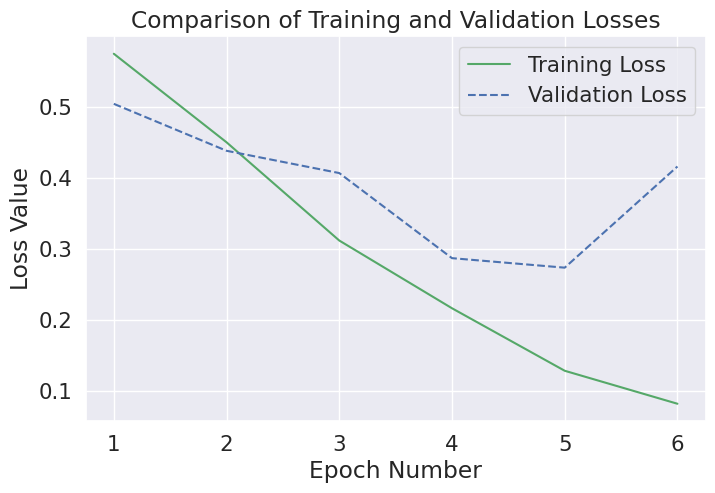

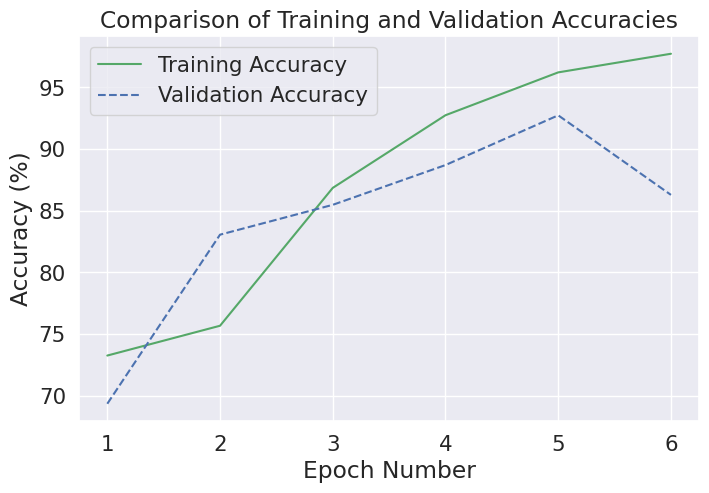

True Positives =  75
False Positives =  11
True Negatives =  32
False Negatives =  6




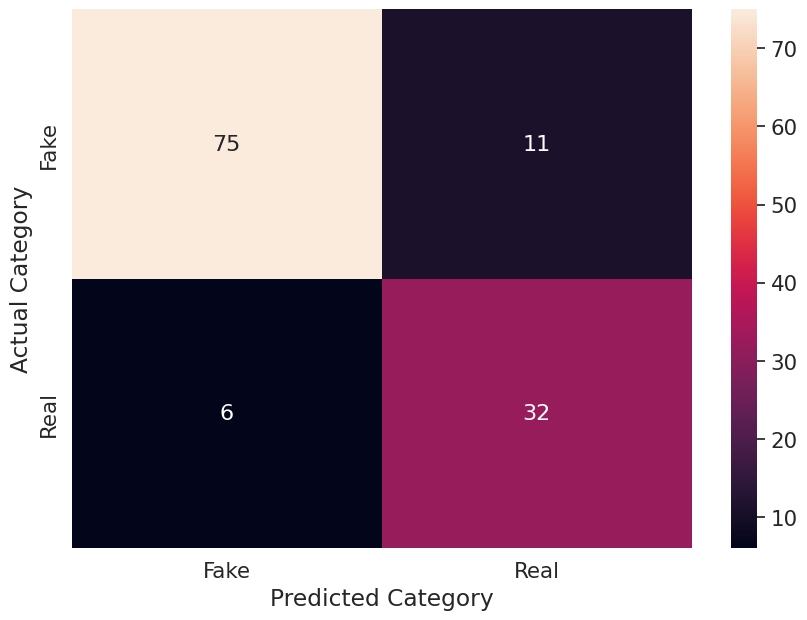

Overall Accuracy: 86.29%
None


In [ ]:
# Plot the results from training and testing
visualize_training_loss(average_training_loss, average_validation_loss, total_epochs)
visualize_training_accuracy(average_training_accuracy, average_validation_accuracy, total_epochs)

# Compute and display the confusion matrix
computed_confusion_matrix = display_confusion_matrix(true_labels, predicted_labels)
print(computed_confusion_matrix)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming true_labels and predicted_labels are lists or numpy arrays containing the true and predicted labels respectively

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='binary')
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='binary')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='binary')
print("F1 Score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8629032258064516
Precision: 0.7441860465116279
Recall: 0.8421052631578947
F1 Score: 0.7901234567901234
Confusion Matrix:
 [[75 11]
 [ 6 32]]
